# Corona virus analysis

In [ ]:
!pip install pycountry

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from fbprophet import Prophet
import pycountry
import plotly.express as px

## Data dictionary 

- Sno - Serial number
- ObservationDate - Date of the observation in MM/DD/YYYY
- Province/State - Province or state of the observation (Could be empty when missing)
- Country/Region - Country of observation
- Last Update - Time in UTC at which the row is updated for the given province or country. (Not standardised and so please clean before using it)
- Confirmed - Cumulative number of confirmed cases till that date
- Deaths - Cumulative number of of deaths till that date
- Recovered - Cumulative number of recovered cases till that date

In [ ]:
df = pd.read_csv('data/covid_19_data.csv',parse_dates=['Last Update'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv("data/time_series_covid_19_confirmed.csv")
df_recovered = pd.read_csv("data/time_series_covid_19_recovered.csv")
df_deaths = pd.read_csv("data/time_series_covid_19_deaths.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [ ]:
df

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
6157,6158,03/16/2020,Cayman Islands,UK,2020-03-16 14:53:04,1.0,1.0,0.0
6158,6159,03/16/2020,Gibraltar,UK,2020-03-14 16:33:03,1.0,0.0,1.0
6159,6160,03/16/2020,Diamond Princess cruise ship,Australia,2020-03-14 02:33:04,0.0,0.0,0.0
6160,6161,03/16/2020,West Virginia,US,2020-03-10 02:33:04,0.0,0.0,0.0


In [ ]:
df_confirmed

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,NaN,Saint Lucia,13.9094,-60.9789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
438,NaN,Saint Vincent and the Grenadines,12.9843,-61.2872,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
439,NaN,Suriname,3.9193,-56.0278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
440,"Virgin Islands, U.S.",US,18.3358,-64.8963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Latest cases we have
df.tail()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
6157,6158,03/16/2020,Cayman Islands,UK,2020-03-16 14:53:04,1.0,1.0,0.0
6158,6159,03/16/2020,Gibraltar,UK,2020-03-14 16:33:03,1.0,0.0,1.0
6159,6160,03/16/2020,Diamond Princess cruise ship,Australia,2020-03-14 02:33:04,0.0,0.0,0.0
6160,6161,03/16/2020,West Virginia,US,2020-03-10 02:33:04,0.0,0.0,0.0
6161,6162,03/16/2020,NaN,occupied Palestinian territory,2020-03-11 20:53:02,0.0,0.0,0.0


In [ ]:
# If you want the latest dataset
df_new = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-18-2020.csv")
df_new.rename(columns={'Country/Region':'Country'}, inplace=True)

In [ ]:
df_new.tail()

,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
279,NaN,Guernsey,2020-03-17T18:33:03,0,0,0,49.4500,-2.580
280,NaN,Jersey,2020-03-17T18:33:03,0,0,0,49.1900,-2.110
281,NaN,Puerto Rico,2020-03-17T16:13:14,0,0,0,18.2000,-66.500
282,NaN,Republic of the Congo,2020-03-17T21:33:03,0,0,0,-1.4400,15.556
283,NaN,The Gambia,2020-03-18T14:13:56,0,0,0,13.4667,-16.600


## Cases by country and date

In [ ]:
df.groupby(["Date", "Country"])[['SNo', 'Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Date,Country,SNo,Confirmed,Deaths,Recovered
0,01/22/2020,Hong Kong,13,0.0,0.0,0.0
1,01/22/2020,Japan,36,2.0,0.0,0.0
2,01/22/2020,Macau,21,1.0,0.0,0.0
3,01/22/2020,Mainland China,535,547.0,17.0,28.0
4,01/22/2020,South Korea,38,1.0,0.0,0.0
...,...,...,...,...,...,...
2897,03/16/2020,Uruguay,6075,8.0,0.0,0.0
2898,03/16/2020,Uzbekistan,6090,6.0,0.0,0.0
2899,03/16/2020,Venezuela,6054,17.0,0.0,0.0
2900,03/16/2020,Vietnam,5989,61.0,0.0,16.0


## Cases in Mexico

In [ ]:
df.query('Country=="Mexico"').groupby("Last Update")[['Confirmed', 'Deaths', 'Recovered']].sum().sort_values("Last Update").reset_index()

,Last Update,Confirmed,Deaths,Recovered
0,2020-01-23 17:00:00,0.0,0.0,0.0
1,2020-02-28 15:03:26,1.0,0.0,0.0
2,2020-02-29 21:13:17,4.0,0.0,0.0
3,2020-03-01 23:33:03,10.0,0.0,0.0
4,2020-03-03 10:03:04,15.0,0.0,3.0
5,2020-03-06 16:43:04,12.0,0.0,2.0
6,2020-03-08 05:13:06,14.0,0.0,2.0
7,2020-03-10 05:13:07,7.0,0.0,4.0
8,2020-03-11 20:00:00,12.0,0.0,4.0
9,2020-03-11 21:13:24,8.0,0.0,4.0


## Cases by country

In [ ]:
df.groupby("Country")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Country,Confirmed,Deaths,Recovered
0,Azerbaijan,1.0,0.0,0.0
1,"('St. Martin',)",2.0,0.0,0.0
2,Afghanistan,95.0,0.0,1.0
3,Albania,211.0,6.0,0.0
4,Algeria,340.0,14.0,52.0
...,...,...,...,...
166,Uzbekistan,7.0,0.0,0.0
167,Vatican City,4.0,0.0,0.0
168,Venezuela,29.0,0.0,0.0
169,Vietnam,915.0,0.0,470.0


In [ ]:
df

## Plot of cases worldwide

In [ ]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=confirmed['Date'],
                y=confirmed['Confirmed'],
                name='Confirmed',
                marker_color='blue'
                ))
fig.add_trace(go.Bar(x=deaths['Date'],
                y=deaths['Deaths'],
                name='Deaths',
                marker_color='Red'
                ))
fig.add_trace(go.Bar(x=recovered['Date'],
                y=recovered['Recovered'],
                name='Recovered',
                marker_color='Green'
                ))

fig.update_layout(
    title='Worldwide Corona Virus Cases - Confirmed, Deaths, Recovered (Bar Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'], 
                         y=confirmed['Confirmed'],
                         mode='lines+markers',
                         name='Confirmed',
                         line=dict(color='blue', width=2)
                        ))
fig.add_trace(go.Scatter(x=deaths['Date'], 
                         y=deaths['Deaths'],
                         mode='lines+markers',
                         name='Deaths',
                         line=dict(color='Red', width=2)
                        ))
fig.add_trace(go.Scatter(x=recovered['Date'], 
                         y=recovered['Recovered'],
                         mode='lines+markers',
                         name='Recovered',
                         line=dict(color='Green', width=2)
                        ))
fig.update_layout(
    title='Worldwide Corona Virus Cases - Confirmed, Deaths, Recovered (Line Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)
fig.show()

## Map of cases

In [ ]:
df_confirmed = df_confirmed[["Province/State","Lat","Long","Country"]]
df_temp = df.copy()
df_temp['Country'].replace({'Mainland China': 'China'}, inplace=True)
df_latlong = pd.merge(df_temp, df_confirmed, on=["Country", "Province/State"])

fig = px.density_mapbox(df_latlong, 
                        lat="Lat", 
                        lon="Long", 
                        hover_name="Province/State", 
                        hover_data=["Confirmed","Deaths","Recovered"], 
                        animation_frame="Date",
                        color_continuous_scale="Portland",
                        radius=7, 
                        zoom=0,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases Time Lapse - Confirmed, Deaths, Recovered',
                  font=dict(family="Courier New, monospace",
                            size=18,
                            color="#7f7f7f")
                 )
fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})


fig.show()

## Forecast for confirmed cases wordlwide

In [ ]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [ ]:
confirmed.head()

,ds,y
0,2020-01-22,555.0
1,2020-01-23,653.0
2,2020-01-24,941.0
3,2020-01-25,1438.0
4,2020-01-26,2118.0


In [ ]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future_confirmed = future.copy() # for non-baseline predictions later on
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds
57,2020-03-19
58,2020-03-20
59,2020-03-21
60,2020-03-22
61,2020-03-23


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
52,2020-03-14,143624.382245,126634.320763,160074.251561
53,2020-03-15,148103.155944,131888.065381,164949.433937
54,2020-03-16,152603.679605,135917.974088,168168.656262
55,2020-03-17,152189.237960,136210.381408,168235.386794
56,2020-03-18,156613.988862,139997.682657,173346.901899
57,2020-03-19,160956.950493,145125.247636,178274.140503
58,2020-03-20,166198.277581,149803.537025,181779.955090
59,2020-03-21,170342.797238,152932.970643,187058.560473
60,2020-03-22,174821.570937,158442.103061,191762.636667
61,2020-03-23,179322.094598,163034.151498,195770.120434


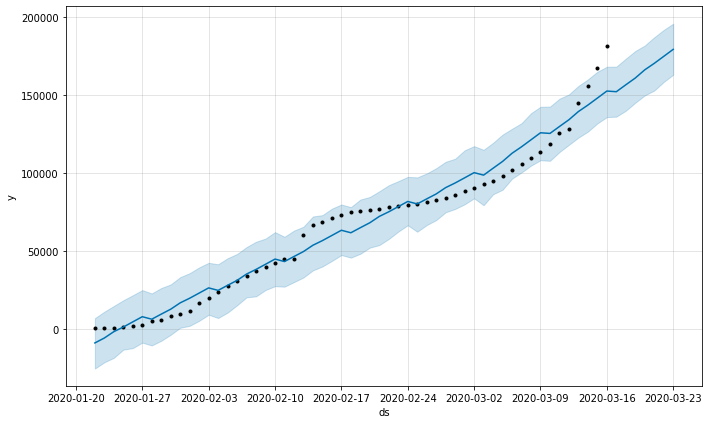

In [ ]:
confirmed_forecast_plot = m.plot(forecast)

## Exponential and logistic modeling

Population growth rate (change in number of individuals in a population over time):

$$
\frac{dN}{dt} = rN
$$

In this equation, $dN/dt$ is the growth rate of the population in a given instant, $N$ is population size, $t$ is time, and $r$ is the per capita rate of increase –that is, how quickly the population grows per individual already in the population.

![alt text](https://fastly.kastatic.org/ka-perseus-images/69602c1370155fd480bb092161bb963905c5c212.png)

In [ ]:
countries = df['Country'].unique().tolist()
data_new ={}
for name in countries:
    a = df[df['Country']==name].groupby('Date').sum()
    data_new[name] = a.to_numpy()

len(countries)

171

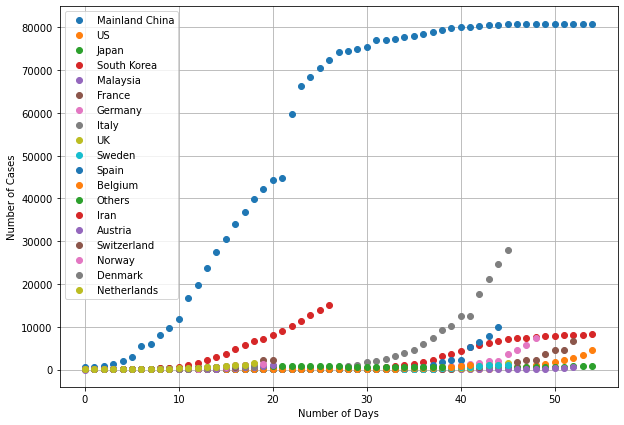

In [ ]:
from matplotlib.pylab import *

figure(figsize=(10,7))
large_cases = []
for name in countries:
    confirm = data_new[name][:,1]
    if confirm[-1] > 500:
        plot(confirm, 'o', label=name)
        large_cases.append(name)
legend(fontsize=10, loc="best")
xlabel('Number of Days')
ylabel('Number of Cases')
grid('on')
show()

If we solve for N we get:

$$
N(t) = \frac{K}{1 + e^{-r(t-t_0)}}.
$$

Where:

- $e$ = the natural logarithm base (also known as Euler's number),
- $t_0$ = the t-value of the sigmoid where the rate starts to decrease, the midpoint of its evolution and the 'inflexion point' of the sigmoid's curve.
- $K$ =the curve's maximum value; in this case the maximum number of deaths.
- $r$ = the logistic growth rate or steepness of the curve

For easy programming we are transforming that equation into:

```python
a/(d + b*np.exp(-c * x)
```

Where we are also going to set a new parameter if d!=1.

# Fit for china

In [ ]:
from scipy.optimize import curve_fit

limit = 25
china_conf = data_new['Mainland China'][:,1][0:limit]
china_ded = data_new['Mainland China'][:,2][0:limit]
china_rev = data_new['Mainland China'][:,3][0:limit]

In [ ]:
china_conf

array([  547.,   639.,   916.,  1399.,  2062.,  2863.,  5494.,  6070.,
        8124.,  9783., 11871., 16607., 19693., 23680., 27409., 30553.,
       34075., 36778., 39790., 42306., 44327., 44699., 59832., 66292.,
       68347.])

In [ ]:
# Perform exponential fit for data 
def func(x, a, b, c, d):
    return a/(d + b*np.exp(-c * x))

xdata = np.arange(0,len(china_conf),1)
popt, pcov = curve_fit(func, xdata, china_conf)

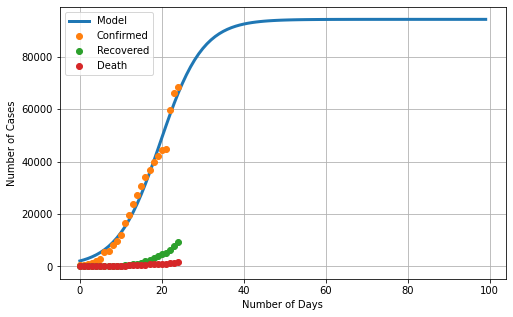

In [ ]:
figure(figsize=(8,5))
x_100 = np.arange(0,100,1)
plot(x_100, func(x_100, *popt), label='Model', linewidth=3)
plot(xdata, china_conf, 'o', label='Confirmed')
plot(xdata, china_rev, 'o', label='Recovered')
plot(xdata, china_ded, 'o', label='Death')
legend()
xlabel('Number of Days')
ylabel('Number of Cases')
grid('on')
show()

## Fit for Other Countries

In [ ]:
def covid_fit(name,days, start, stop):
    name_conf = data_new[name][:,1][start:stop]
    name_ded = data_new[name][:,2][start:stop]
    name_rev = data_new[name][:,3][start:stop]
    # Perform exponential fit for data 
    def func(x, a, b, c, d):
        return a/(d + b*np.exp(-c * x))
    print(name_conf)
    xdata = np.arange(0,len(name_conf),1)
    x_100 = np.arange(0, days,1)
    popt, pcov = curve_fit(func, xdata, name_conf)
    figure(figsize=(7,4))
    plot(x_100, func(x_100, *popt), label='Model', linewidth=3)
    plot(xdata, name_conf, 'o', label='Confirmed')
    plot(xdata, name_rev, 'o', label='Recovered')
    plot(xdata, name_ded, 'o', label='Death')
    legend()
    xlabel('Number of Days')
    ylabel('Number of Cases')
    title(name)
    grid('on')
    show()

[  322.   453.   655.   888.  1128.  1694.  2036.  2502.  3089.  3858.
  4636.  5883.  7375.  9172. 10149. 12462. 12462. 17660. 21157. 24747.
 27980.]


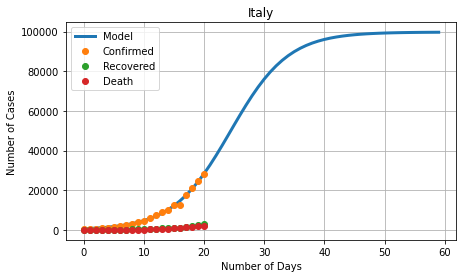

In [ ]:
covid_fit('Italy',60,25,50)

[ 4.  5.  5.  5.  5.  5.  6.  6.  7.  7.  7.  8. 12. 12. 26. 41. 53.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

overflow encountered in exp



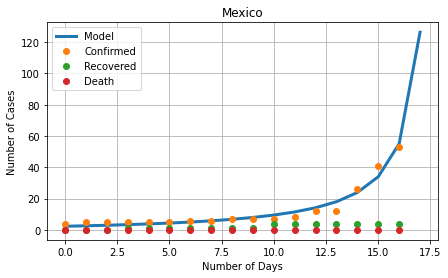

In [ ]:
covid_fit('Mexico',18,2,25)

## Reproducing plots

In [ ]:
grp = df.groupby(["Date",'Country'])['Confirmed'].sum().reset_index()
grp = grp[grp.Date == "03/16/2020"]

In [ ]:
fig = px.bar(grp.sort_values('Confirmed', ascending=False).head(20).sort_values('Confirmed', ascending=True), 
             x="Confirmed", y="Country", title='Confirmed Cases', text='Confirmed', orientation='h', 
             width=700, height=700, range_x = [0, max(grp['Confirmed'])+10000])
fig.update_traces(marker_color='#46cdcf', opacity=0.8, textposition='outside')
fig.show()

## Advance modeling (SAIR)

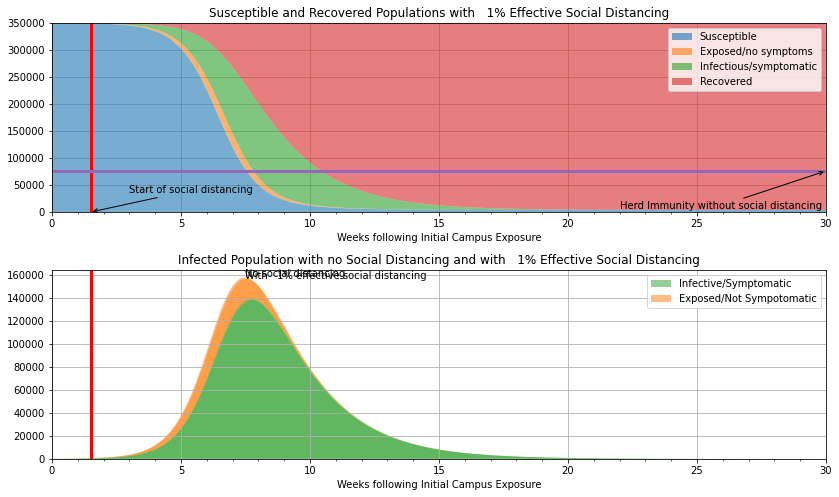

In [8]:
#@title SEIR Model with Social Distancing { run: "auto" }
#@markdown 
#@markdown Reproduction number
R0 = 4.6 #@param {type:"slider", min:0.9, max:5, step:0.1}
#@markdown Disease periods in days
t_incubation = 1.7 #@param {type:"slider", min:1, max:14, step:0.1}
t_infective = 14 #@param {type:"slider", min:1, max:14, step:0.1}
#@markdown Population Size
N = 350000 #@param {type:"slider", min:1000, max:350000, step: 1000}
#@markdown Initial number exposed
n = 98 #@param {type:"slider", min:0, max:100, step:1}
#@markdown Start of social distancing following exposure (weeks)
t_social_distancing = 1.5 #@param {type:"slider", min:0, max:30, step:0.1}
#@markdown Effectiveness of social distancing (0 to 100%)
u_social_distancing = 1 #@param {type:"slider", min:0, max:100, step:1}

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns

# initial number of infected and recovered individuals
e_initial = n/N
i_initial = 0.00
r_initial = 0.00
s_initial = 1 - e_initial - i_initial - r_initial

alpha = 1/t_incubation
gamma = 1/t_infective
beta = R0*gamma

def step(t):
    return 1 if t >= 7*t_social_distancing else 0

# SEIR model differential equations.
def deriv(x, t, u, alpha, beta, gamma):
    s, e, i, r = x
    dsdt = -(1-u*step(t)/100)*beta * s * i
    dedt =  (1-u*step(t)/100)*beta * s * i - alpha * e
    didt = alpha * e - gamma * i
    drdt =  gamma * i
    return [dsdt, dedt, didt, drdt]

t = np.linspace(0, 210, 210)
x_initial = s_initial, e_initial, i_initial, r_initial
s, e, i, r = odeint(deriv, x_initial, t, args=(u_social_distancing, alpha, beta, gamma)).T
s0, e0, i0, r0 = odeint(deriv, x_initial, t, args=(0, alpha, beta, gamma)).T

# plot the data
fig = plt.figure(figsize=(12, 10))
ax = [fig.add_subplot(311, axisbelow=True), 
      fig.add_subplot(312)]

pal = sns.color_palette()

ax[0].stackplot(t/7, N*s, N*e, N*i, N*r, colors=pal, alpha=0.6)
ax[0].set_title('Susceptible and Recovered Populations with {0:3.0f}% Effective Social Distancing'.format(u_social_distancing))
ax[0].set_xlabel('Weeks following Initial Campus Exposure')
ax[0].set_xlim(0, t[-1]/7)
ax[0].set_ylim(0, N)
ax[0].legend([
    'Susceptible', 
    'Exposed/no symptoms', 
    'Infectious/symptomatic',
    'Recovered'], 
    loc='best')
ax[0].plot(np.array([t_social_distancing, t_social_distancing]), ax[0].get_ylim(), 'r', lw=3)
ax[0].plot(np.array([0, t[-1]])/7, [N/R0, N/R0], lw=3, label='herd immunity')
ax[0].annotate("Start of social distancing",
    (t_social_distancing, 0), (t_social_distancing + 1.5, N/10),
    arrowprops=dict(arrowstyle='->'))
ax[0].annotate("Herd Immunity without social distancing",
    (t[-1]/7, N/R0), (t[-1]/7 - 8, N/R0 - N/5),
    arrowprops=dict(arrowstyle='->'))

ax[1].stackplot(t/7, N*i0,N*e0, colors=pal[2:0:-1], alpha=0.5)
ax[1].stackplot(t/7, N*i, N*e, colors=pal[2:0:-1], alpha=0.5)
ax[1].set_title('Infected Population with no Social Distancing and with {0:3.0f}% Effective Social Distancing'.format(u_social_distancing))
ax[1].set_xlim(0, t[-1]/7)
ax[1].set_ylim(0, max(0.3*N, 1.05*max(N*(e + i))))
ax[1].set_xlabel('Weeks following Initial Campus Exposure')
ax[1].legend([
    'Infective/Symptomatic', 
    'Exposed/Not Sympotomatic'],
    loc='upper right')
ax[1].plot(np.array([t_social_distancing, t_social_distancing]), ax[0].get_ylim(), 'r', lw=3)

y0 = N*(e0 + i0)
k0 = np.argmax(y0)
ax[1].annotate("No social distancing", (t[k0]/7, y0[k0] + 100))

y = N*(e + i)
k = np.argmax(y)
ax[1].annotate("With {0:3.0f}% effective social distancing ".format(u_social_distancing), (t[k]/7, y[k] + 100))

for a in ax:
    a.xaxis.set_major_locator(plt.MultipleLocator(5))
    a.xaxis.set_minor_locator(plt.MultipleLocator(1))
    a.xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
    a.grid(True)

plt.tight_layout()